In [2]:
%pip install tqdm

  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
import re
from tqdm import tqdm
import pickle
import numpy as np
from collections import Counter
import random

# Experimenting

In [ ]:
example = pd.read_pickle("./shared/to_vid/datasets/HolyDataset.pkl")
# shape of data
# x_train = HolyDataset[0]
# x_test = HolyDataset[1]
# y_train = HolyDataset[2]
# y_test = HolyDataset[3]
# labels = HolyDataset[4]

In [22]:
df = pd.read_pickle("./Energy_graph/data/processed/REFIT.pkl")

In [26]:
# go over all datasets take 20% of the households rounded down from each dataset and use them for evaluation and use rest for training
# if only one household is in dataset use it for training
# if two,three,four households are in dataset use one for evaluation and rest for training
# labels potentially useless as we will try to predict all appliances
# let's say bellow 2w device is off and above 2w device is on so in kWh with 8s sampling rate we have 0.000004kWh as threshold 4.4e-06
# time_window stand for rows in dataset so all datasets need to have same sampling rate !!!!
# shape the data as an array of tuples of shape (X_train, X_test, Y_train, Y_test) where X_train is an array of shape (time_widow) and Y_train is an array of shape (time_window) and X_test is an array of shape (time_window) and Y_test is an array of shape (time_window)
for file in os.listdir("./Energy_graph/data/training_data/"):
    if not file.endswith(".pkl"):
        continue
    df = pd.read_pickle("./Energy_graph/data/training_data/" + file)
    print(len(list(df.keys())))

6
6
20
5
1
22
5
1
2
1
1
1


In [30]:
data = pd.read_pickle("./Energy_graph/data/training_data/REFIT.pkl")

In [31]:
data["REFIT_1"]

{'aggregate':                      aggregate
 Time                          
 2013-10-09 13:06:16   0.001162
 2013-10-09 13:06:24   0.001169
 2013-10-09 13:06:32   0.001169
 2013-10-09 13:06:40   0.001200
 2013-10-09 13:06:48   0.001200
 ...                        ...
 2015-07-10 11:56:00   0.000400
 2015-07-10 11:56:08   0.000416
 2015-07-10 11:56:16   0.000402
 2015-07-10 11:56:24   0.000413
 2015-07-10 11:56:32   0.000404
 
 [6003014 rows x 1 columns],
 ' fridge':                        fridge
 Time                         
 2013-10-09 13:06:16  0.000164
 2013-10-09 13:06:24  0.000167
 2013-10-09 13:06:32  0.000167
 2013-10-09 13:06:40  0.000164
 2013-10-09 13:06:48  0.000164
 ...                       ...
 2015-07-10 11:56:00  0.000000
 2015-07-10 11:56:08  0.000000
 2015-07-10 11:56:16  0.000000
 2015-07-10 11:56:24  0.000000
 2015-07-10 11:56:32  0.000000
 
 [6003014 rows x 1 columns],
 ' chest freezer':                       chest freezer
 Time                               
 20

In [32]:
df = data["REFIT_1"]["aggregate"]
for device in data["REFIT_1"]:
    if device == "aggregate":
        continue
    df = pd.concat([df, data["REFIT_1"][device]], axis=1)


,aggregate,fridge,chest freezer,upright freezer,tumble dryer,washing machine,dishwasher,computer site,television site,electric heater
Time,,,,,,,,,,
2013-10-09 13:06:16,0.001162,0.000164,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:24,0.001169,0.000167,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:32,0.001169,0.000167,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:40,0.001200,0.000164,0.0000,0.000151,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:48,0.001200,0.000164,0.0000,0.000151,0.0,0.0,0.0,0.0,0.0,0.000002
...,...,...,...,...,...,...,...,...,...,...
2015-07-10 11:56:00,0.000400,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002
2015-07-10 11:56:08,0.000416,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002
2015-07-10 11:56:16,0.000402,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002


In [34]:

for c in df.columns:
    if c == "aggregate":
        continue

    df[c] = df[c].apply(lambda x: 1 if x > 4.4e-5 else 0)
    

In [2]:
df = pd.read_pickle("./Energy_graph/data/processed_all.pkl")

In [8]:
df["REDD_3"].head(50)

,aggregate,fridge,waste disposal unit,dish washer,electric furnace,microwave,smoke alarm,washer dryer
2011-04-16 01:11:20-04:00,0.000000,0,0,0,0,0,0,0
2011-04-16 01:11:28-04:00,0.000700,1,0,0,0,0,0,0
2011-04-16 01:11:36-04:00,0.000703,1,0,0,0,0,0,0
2011-04-16 01:11:44-04:00,0.000719,1,0,0,0,0,0,0
2011-04-16 01:11:52-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:00-04:00,0.000702,1,0,0,0,0,0,0
2011-04-16 01:12:08-04:00,0.000705,1,0,0,0,0,0,0
2011-04-16 01:12:16-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:24-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:32-04:00,0.000704,0,0,0,0,0,0,0


In [59]:
time_window = 2550
windows = []
upper_bound = pd.Timedelta(seconds=32)  
for i in range(0, len(df) - time_window, time_window + 1):
    window = df.iloc[i:i + time_window]
    windows.append(window)






In [60]:

windows[0]
count = 0
test = 0

# this constraint can be relaxed in the future for now we will use it to filter out windows that have gaps of more than 32 seconds for eg. in the future if a window has only 1 gap of one minute we can still use that window

for window in windows:
    test += 1
    time_diffs = window.index.to_series().diff().dropna()
    if  (time_diffs <= upper_bound).all():
        count += 1
    # else:
        # continue
        # print(window.index.to_series().diff().dropna().unique())
    # print(len(window.index.to_series().diff().dropna().unique()))

len(windows) - count


556

# Balancing the data

In [35]:
data = pd.read_pickle("./Energy_graph/data/processed_all_values.pkl")


### Functions

In [36]:
def sample_normal_within_range(mu=10, sigma=5, a=2, b=20, n=1):
    samples = []
    while len(samples) < n:
        value = round(np.random.normal(mu, sigma))
        if a <= value <= b:
            samples.append(value)
    return np.array(samples)[0]


count_all=0
count_skipped=0
def process_data(df : pd.DataFrame, hours) -> list:
    global count_skipped # debug
    global count_all
    time_window = int((hours * 60 * 60) / 8) # 12h  
    

    df = df.resample("8S").fillna(method="nearest", limit=4)
    df.fillna(0, inplace=True)
    # df.dropna(inplace=True)
    windows = []
    for i in range(0, len(df) - time_window, time_window + 1):
        count_all += 1
        window = df.iloc[i:i + time_window]
        # how much total time can be missing in the window
        margin = 2
        # check how many gaps are in window
        length = abs((window.index.max() - window.index.min()).total_seconds())

        if length > (hours+2) * 60 * 60:
            print("skipping window with too much missing data Missing: ", length/60/60 - 12 , "h")

            continue

        if length < (hours/2) * 60 * 60:
            print("skipping window with too much missing data Missing: ", length/60/60 - 12 , "h")

            continue
        if window.max().max() < 4.5e-6:
            # print("skipping window with zeros: ", window.max().max())
            count_skipped += 1
            continue
        window.reset_index(drop=True, inplace=True)
        
        windows.append(window)
    
    return windows


### Processing data

In [37]:

devices_processed = {}
path = "./Energy_graph/data/training_data/"
for dataset in tqdm(os.listdir(path)):
    if not dataset.endswith(".pkl"):
        continue
    # if "HES" not in dataset:
    #     continue
    data = pd.read_pickle(path + dataset)
    print(dataset)
    for house in data:
        for device in data[house]:
            if device == "aggregate":
                continue
            name = preprocess_string(device)
            if name not in devices_processed:
                devices_processed[name] = []
            curr_device = process_data(data[house][device], 6)
            devices_processed[name].extend(curr_device)
    # break        

print(count_skipped, count_all, count_skipped/count_all*100)

  0%|          | 0/14 [00:00<?, ?it/s]

IAWE_clean.pkl


  7%|▋         | 1/14 [00:00<00:11,  1.17it/s]

SUST2_clean.pkl


 14%|█▍        | 2/14 [00:03<00:20,  1.71s/it]

REFIT_clean.pkl


 21%|██▏       | 3/14 [02:14<11:08, 60.73s/it]

DEDDIAG_clean.pkl


 36%|███▌      | 5/14 [02:17<04:06, 27.38s/it]

ENERTALK.pkl


 50%|█████     | 7/14 [03:31<03:41, 31.58s/it]

HES_clean.pkl


 57%|█████▋    | 8/14 [03:33<02:26, 24.47s/it]

ECO_clean.pkl


 64%|██████▍   | 9/14 [03:50<01:52, 22.48s/it]

REDD_clean.pkl


 71%|███████▏  | 10/14 [03:52<01:08, 17.04s/it]

HEART_clean.pkl


 79%|███████▊  | 11/14 [03:55<00:39, 13.09s/it]

DRED_clean.pkl


 86%|████████▌ | 12/14 [03:57<00:20, 10.04s/it]

UKDALE_clean.pkl


100%|██████████| 14/14 [07:48<00:00, 33.48s/it]

364836 689582 52.90683341502533


In [38]:
for device in devices_processed:
        print(device, len(devices_processed[device]))



fridge 25845
ac 604
washing machine 12074
pc 22378
iron 154
television 39508
motor 97
coffee machine 2448
vacuum cleaner 581
laptop 4080
toaster 10130
microwave 19984
freezer 20132
handmixer 71
stove oven 166
kettle 20077
fridge freezer 35756
dish washer 9954
tumble dryer 3850
chest freezer 4305
upright freezer 2260
electric heater 1160
food mixer 25
vivarium 1787
pond pump 1076
dryer 781
washer dryer 2998
audio system 7112
router 9174
blender 765
food processor 2746
bread maker 495
oven extractor fan 159
combination microwave 1318
rice cooker 1883
kimchi fridge 4302
water purifier 363
running machine 948
ev 431
air exchanger 431
oven 6358
whirlpool bath 431
towel dryer 431
air exhaust 165
stove 21
stereo 855
tablet 2
fountain 69
electric space heater 292
electric stove 392
electric oven 294
waste disposal unit 49
electric furnace 207
smoke alarm 42
air handling unit 58
minioven 101
monitor 2799
hair dryer 692
watercooker 154
heater 83
gaming pc 101
radio 7
fan 301
electric heating ele

In [39]:
data = pd.read_pickle("./Energy_graph/data/tracebase/devices_data.pkl")

for k in data:
    devices_processed[k].extend(data[k])

In [139]:
sample_normal_within_range()

25

In [40]:
import pickle
with open("./Energy_graph/data/training_data/synthetic/devices_processed.pkl", "wb") as f:
    pickle.dump(devices_processed, f, protocol=pickle.HIGHEST_PROTOCOL)

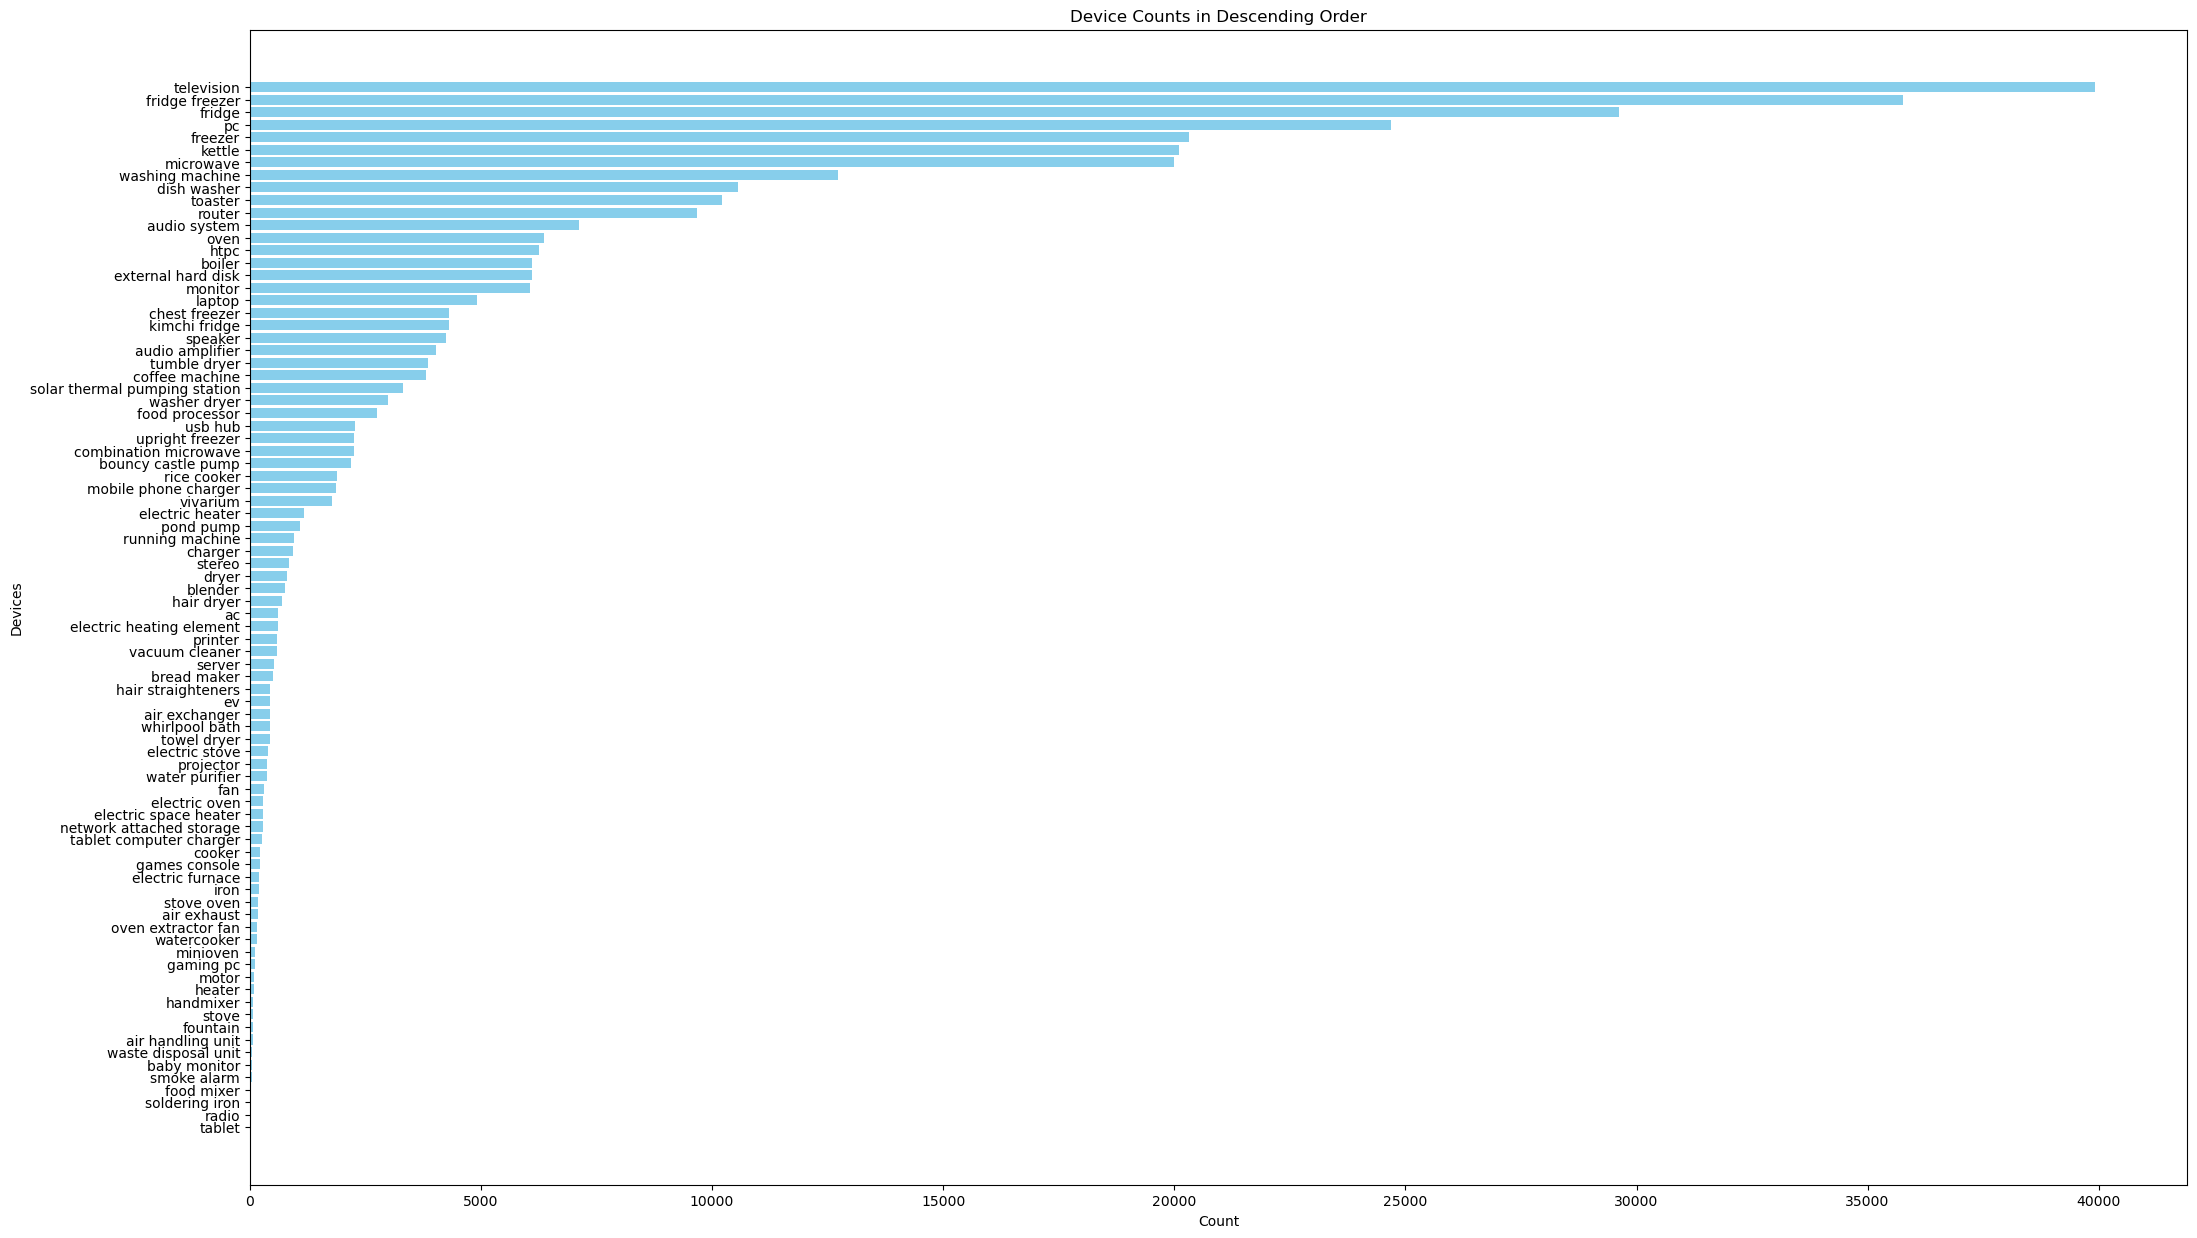

In [41]:
import matplotlib.pyplot as plt
devices_processed = pd.read_pickle("./Energy_graph/data/training_data/synthetic/devices_processed.pkl")
# Extract device names and their lengths
device_names = list(devices_processed.keys())
lengths = [len(devices_processed[device]) for device in device_names]

# Sort them based on lengths in descending order
sorted_indices = sorted(range(len(lengths)), key=lambda k: lengths[k], reverse=True)
sorted_device_names = [device_names[i] for i in sorted_indices]
sorted_lengths = [lengths[i] for i in sorted_indices]

plt.figure(figsize=(25, 15))
# Plotting
plt.barh(sorted_device_names, sorted_lengths, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Devices')
plt.title('Device Counts in Descending Order')
plt.gca().invert_yaxis()  # This is to have the device with the highest count at the top
plt.show()


In [157]:
devices_processed = pd.read_pickle("./Energy_graph/data/training_data/synthetic/devices_processed.pkl")

In [44]:
sorted_device_names = [device_names[i] for i in sorted_indices]
sorted_lengths = [lengths[i] for i in sorted_indices]

for i in range(len(sorted_device_names)):
    print(sorted_device_names[i], sorted_lengths[i])

television 39923
fridge freezer 35756
fridge 29623
pc 24684
freezer 20309
kettle 20094
microwave 19984
washing machine 12716
dish washer 10567
toaster 10214
router 9671
audio system 7112
oven 6358
htpc 6253
boiler 6112
external hard disk 6107
monitor 6062
laptop 4922
chest freezer 4305
kimchi fridge 4302
speaker 4246
audio amplifier 4027
tumble dryer 3850
coffee machine 3811
solar thermal pumping station 3307
washer dryer 2998
food processor 2746
usb hub 2278
upright freezer 2260
combination microwave 2251
bouncy castle pump 2198
rice cooker 1883
mobile phone charger 1859
vivarium 1787
electric heater 1160
pond pump 1076
running machine 948
charger 926
stereo 855
dryer 801
blender 765
hair dryer 692
ac 604
electric heating element 599
printer 584
vacuum cleaner 582
server 530
bread maker 495
hair straighteners 433
ev 431
air exchanger 431
whirlpool bath 431
towel dryer 431
electric stove 392
projector 372
water purifier 363
fan 301
electric oven 294
electric space heater 292
network at

In [155]:
num_windows = 100000
count_full = 0
# window_len = 6
# random.seed(42)
device_list = pd.read_pickle("./Energy_graph/labeles.pkl")
windows = []
for i in tqdm(range(num_windows)):
    nm_device = sample_normal_within_range()
    selected_devices = (random.sample(device_list, nm_device))
    # print(selected_devices)
   
    df = pd.DataFrame()
    for device in selected_devices:
        curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        
        
        while curr_df.max().max() == 0:
            curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
        curr_df.columns = [device]
        df = pd.concat([df, curr_df], axis=1)
    df["aggregate"] = df.sum(axis=1)
    count = 0
    while df["aggregate"].median() < 4.4e-4 or df["aggregate"].mean() < 4.4e-4:
        count += 1
        if count > 20:
            nm_device = sample_normal_within_range()
            selected_devices = (random.sample(device_list, nm_device))
            count = 0
        df = pd.DataFrame()
        for device in selected_devices:
            curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
            
            
            while curr_df.max().max() == 0:
                curr_df = devices_processed[device][random.randint(0, len(devices_processed[device]) - 1)]
            curr_df.columns = [device]
            df = pd.concat([df, curr_df], axis=1)
        df["aggregate"] = df.sum(axis=1)
   

    for c in df.columns:
        if c == "aggregate":
            continue

        df[c] = (df[c] > 4.4e-6).astype(int)
    windows.append(df)

print(count_full/num_windows)

100%|██████████| 100000/100000 [1:18:55<00:00, 21.12it/s] 

0.0


In [156]:
# save to pickle
with open("./Energy_graph/data/training_data/synthetic/synthetic_100k.pkl", "wb") as f:
    pickle.dump(windows, f, protocol=pickle.HIGHEST_PROTOCOL)

In [158]:
labels = pd.read_pickle("./Energy_graph/labeles.pkl")
windows = pd.read_pickle("./Energy_graph/data/training_data/synthetic/synthetic_100k.pkl")
upper_bound = pd.Timedelta(seconds=32)
max_gap = pd.Timedelta(seconds=3600)
X_Y_test= []
skip_count_1 = 0
skip_count_2 = 0
total_count = 0
for window in windows:
    
    x = window["aggregate"].values
    devices = [False] * len(labels)
    for c in window.columns:
        if c == "aggregate":
            continue
        on = (window[c] > 0)
        ix = labels.index(c)
        # print(window[c])
        # print(on.any())
        devices[ix] = on.any()

    X_Y_test.append((x, devices))

# print("Total windows: ", total_count, "Skipped windows due to 30min gap: ", skip_count_1, "Skipped windows due to 4 gaps of 32s or more: ", skip_count_2 ,"Procentage skipped: ", (skip_count_1+skip_count_2) / total_count * 100)

# save to pickle
import pickle
with open("./Energy_graph/data/training_data/synthetic/synthetic_test_100k.pkl", "wb") as f:
    pickle.dump(X_Y_test, f, protocol=pickle.HIGHEST_PROTOCOL)

KeyboardInterrupt: 

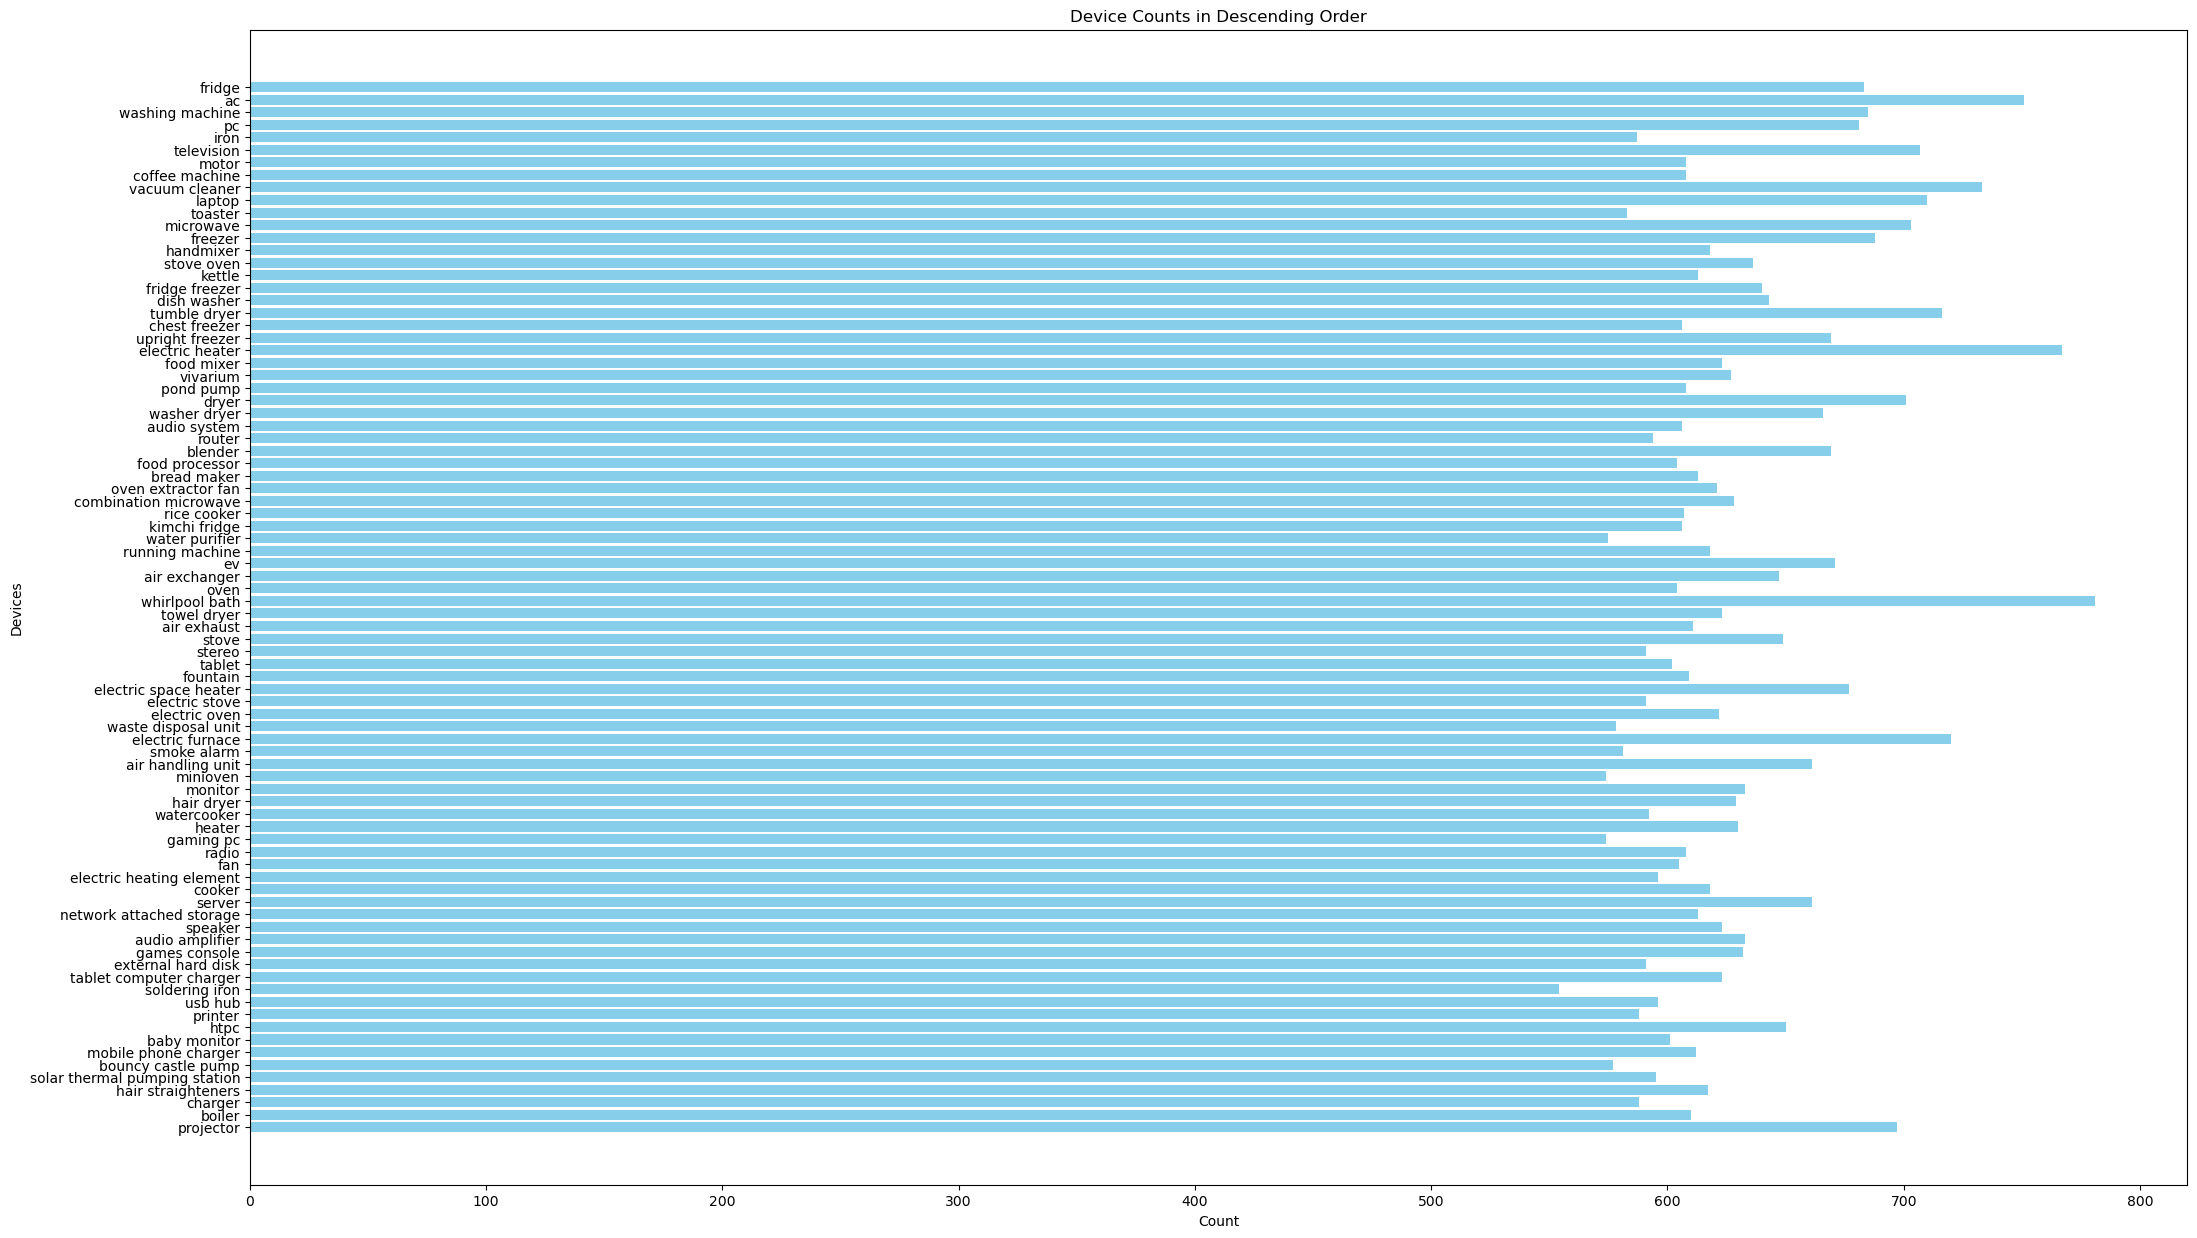

In [152]:
# appearnces
labels = pd.read_pickle("./Energy_graph/labeles.pkl")
appearances = [0] * len(labels)
for house in windows:
    for device in house:
        if device == "aggregate":
            continue
        if device in labels:
            appearances[labels.index(device)] += 1
        else:
            print(device)
            print("not in labels")
            break


plt.figure(figsize=(25, 15))
# Plotting
plt.barh(labels, appearances, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Devices')
plt.title('Device Counts in Descending Order')
plt.gca().invert_yaxis()  # This is to have the device with the highest count at the top
plt.show()

    

[4868, 3018, 3863, 1712, 474, 547, 1186, 4902, 2566, 293, 3510, 4623, 1785, 2989, 815, 2988, 1799, 220, 4785, 3216, 2821, 2479, 1643, 2727, 3607]


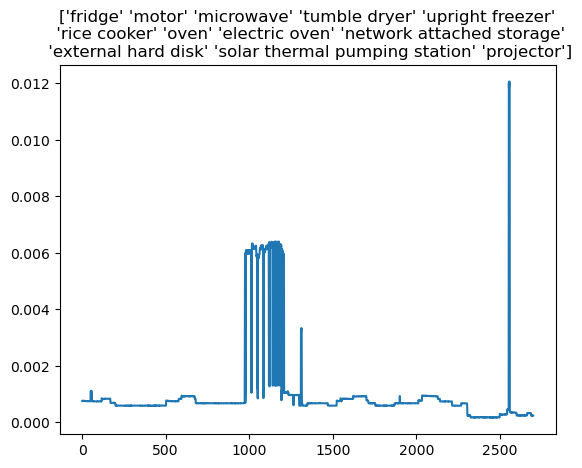

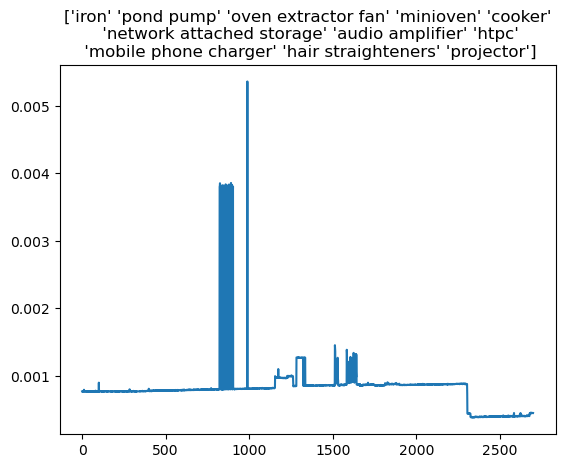

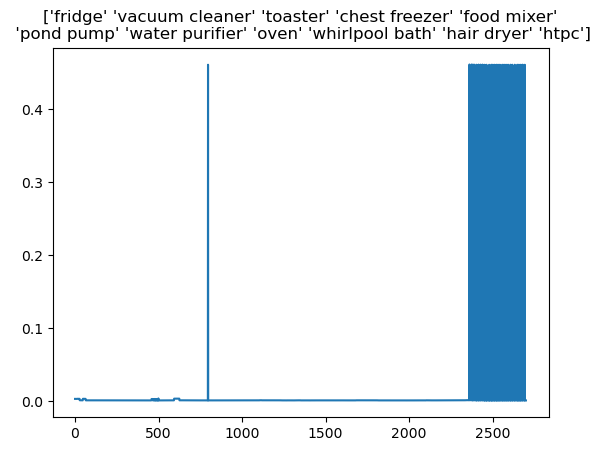

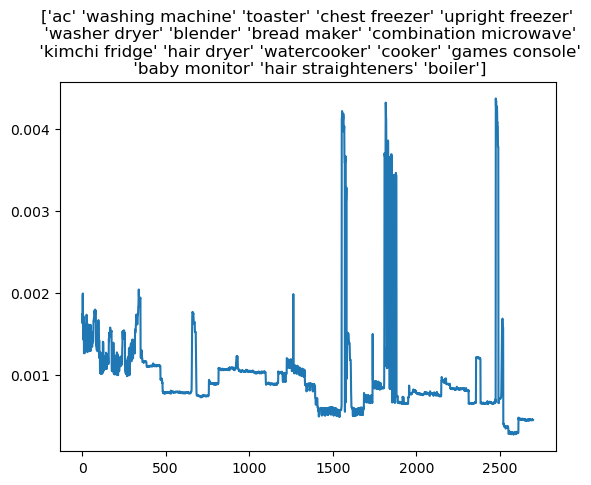

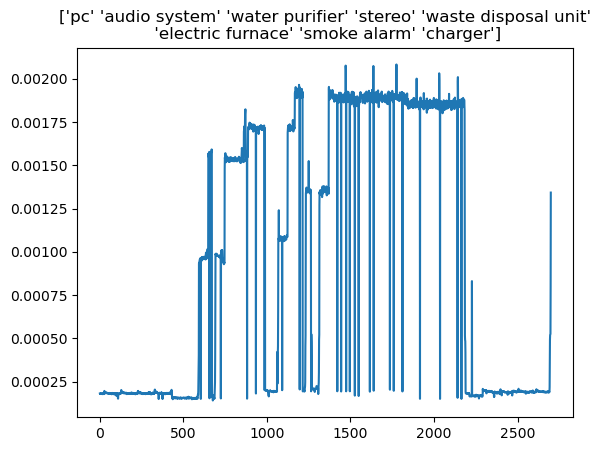

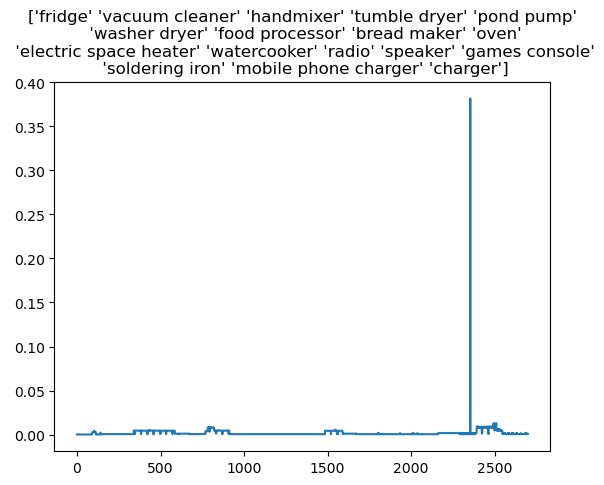

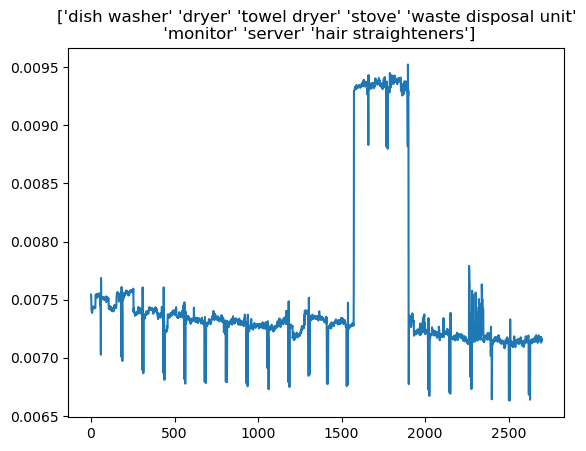

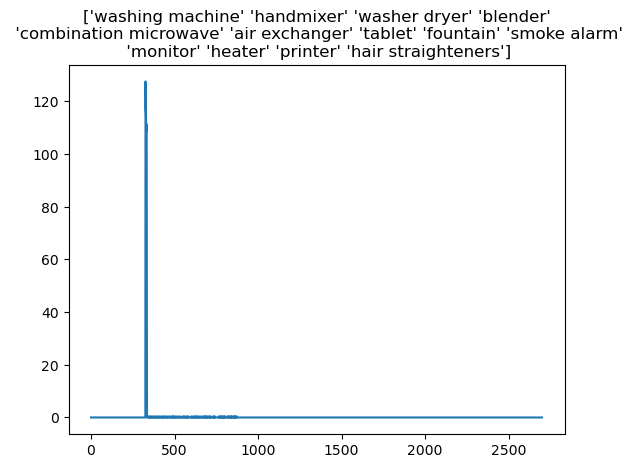

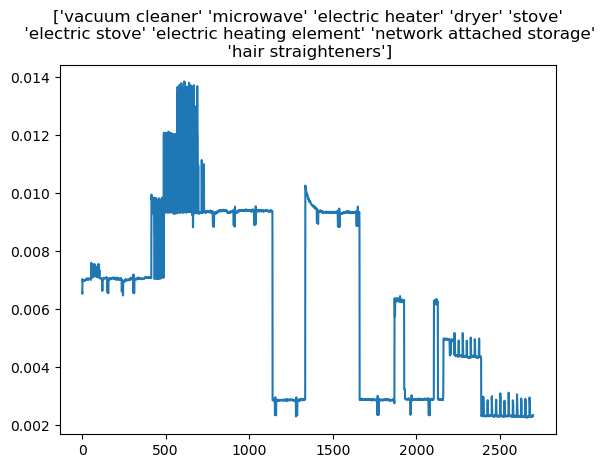

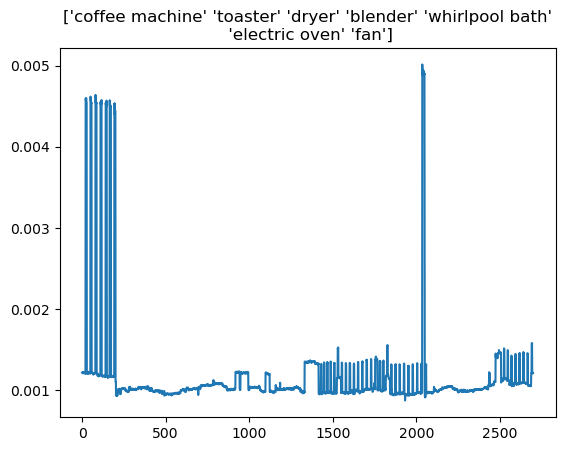

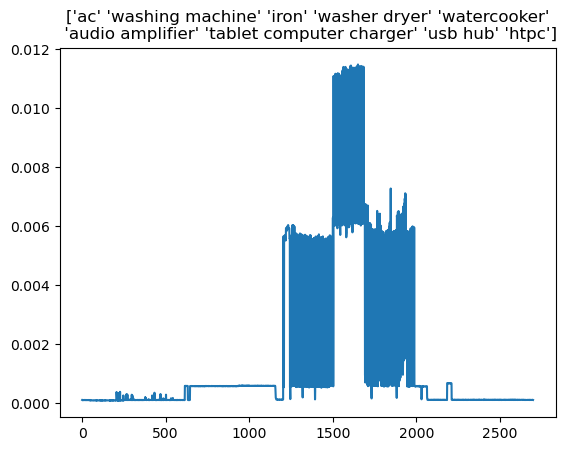

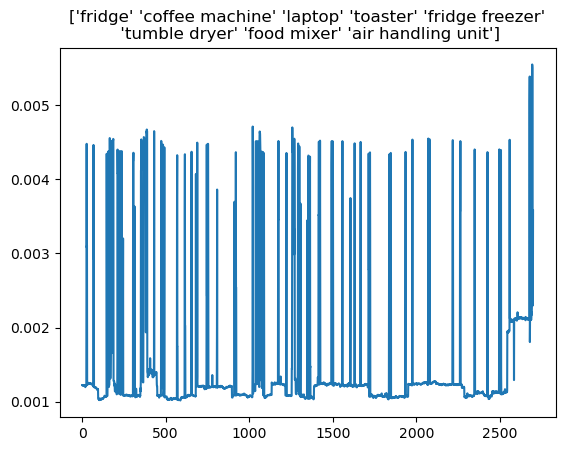

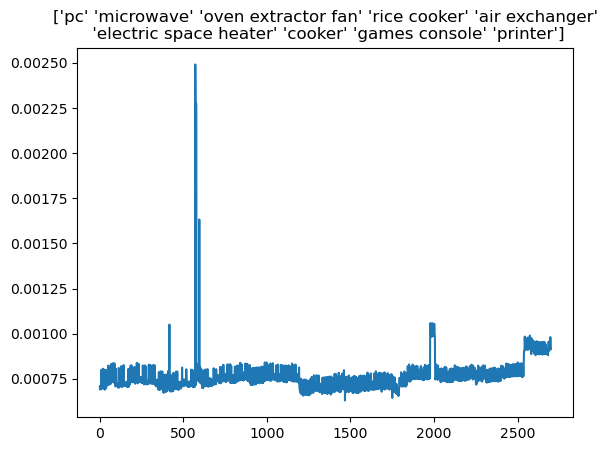

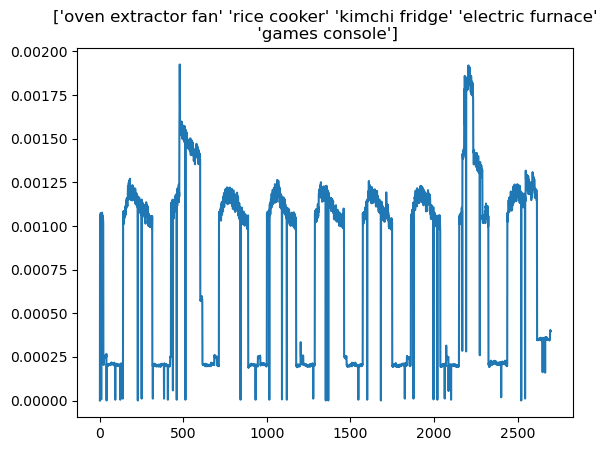

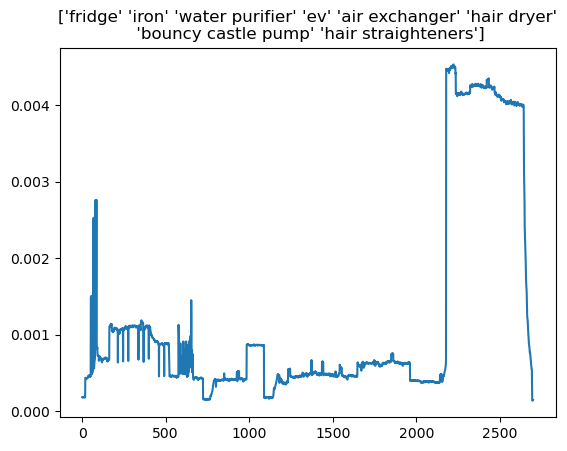

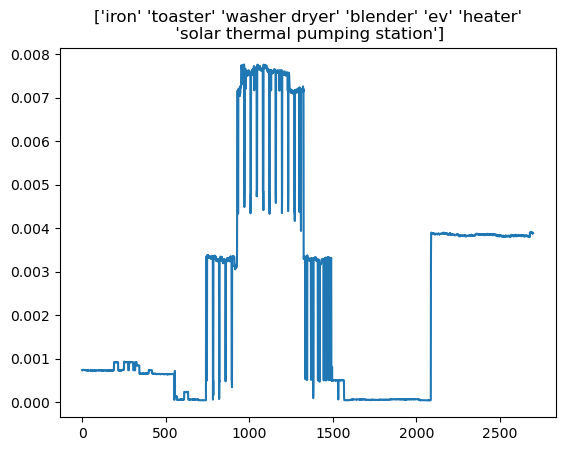

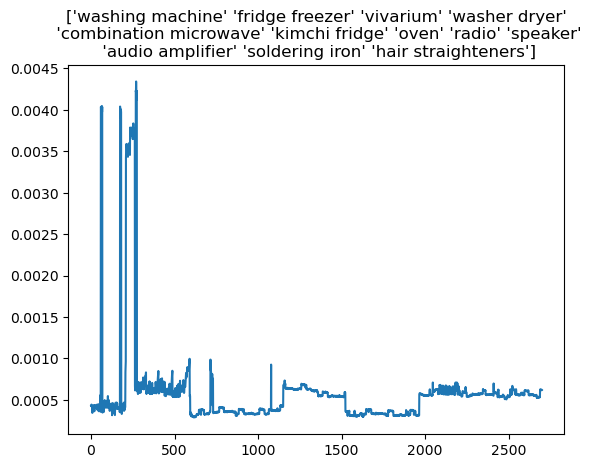

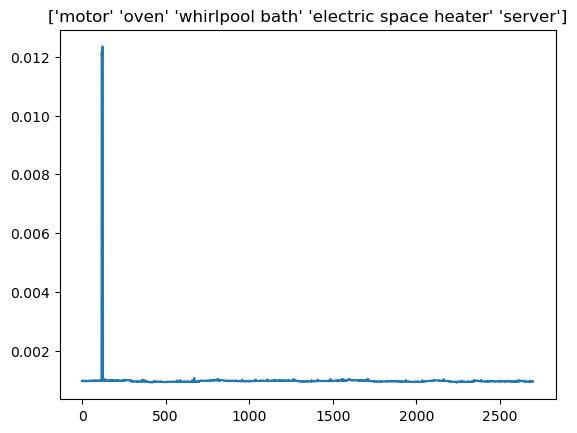

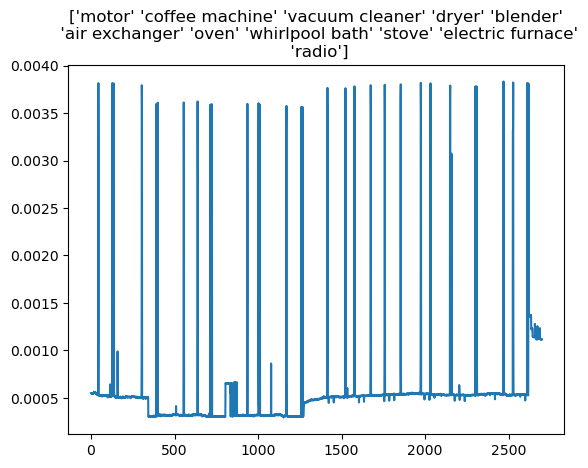

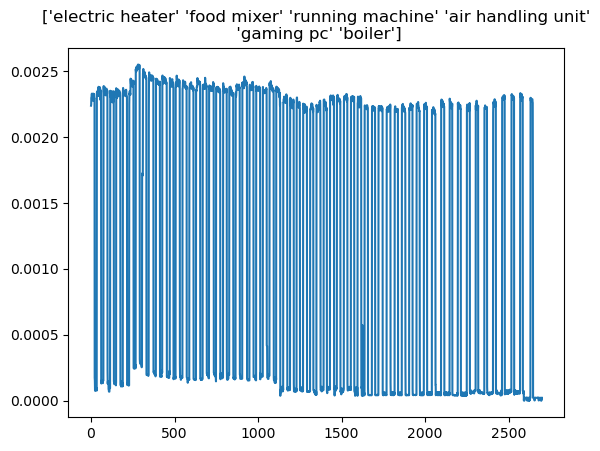

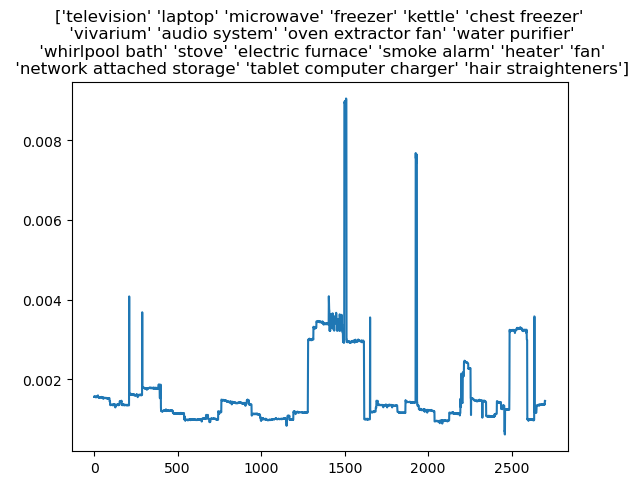

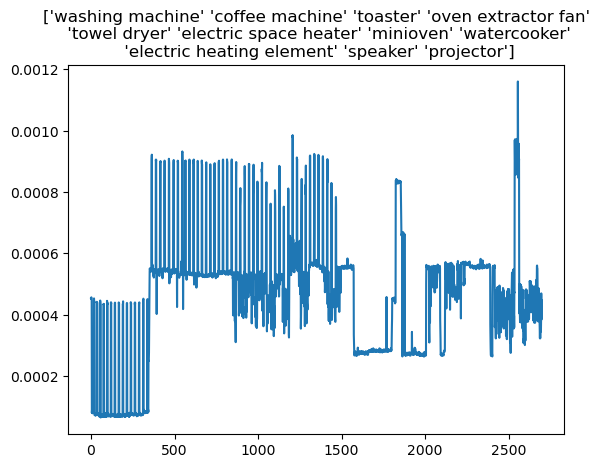

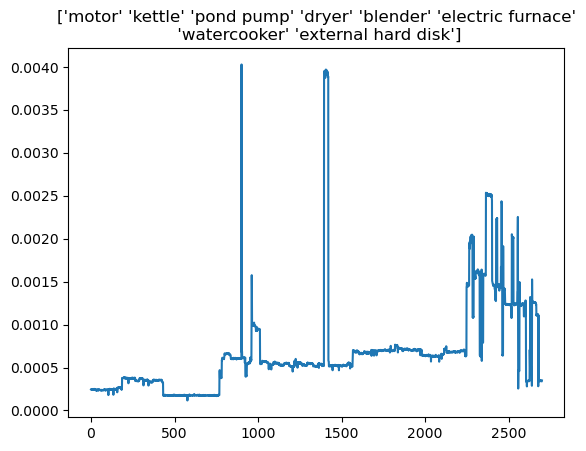

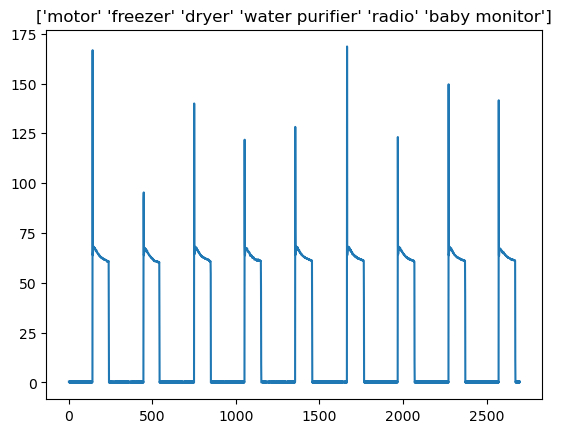

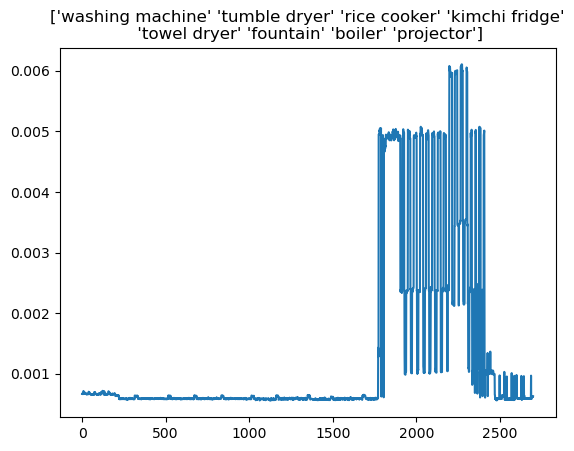

In [154]:
# X_Y = pd.read_pickle("./Energy_graph/data/processed_all_X_Y_2700.pkl")
# plt.plot(X_Y_test[0][0])

indicies = random.sample(range(len(X_Y_test)), 25)
print(indicies)
labels_np = np.array(labels)
for i in indicies:
    plt.plot(X_Y_test[i][0])
    # TODO print used devices
    # print(labels_np[X_Y_test[i][1]])
    # print("*****************")
    plt.title(str(labels_np[X_Y_test[i][1]]))
    plt.show()



array(['television', 'microwave', 'vivarium', 'electric oven', 'speaker',
       'audio amplifier', 'tablet computer charger', 'soldering iron',
       'usb hub', 'htpc', 'baby monitor', 'bouncy castle pump',
       'hair straighteners', 'charger'], dtype='<U29')

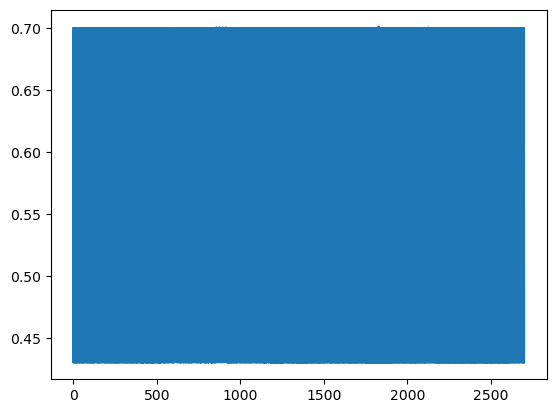

In [144]:
plt.plot(X_Y_test[20][0])
pd.DataFrame(X_Y_test[20][0])
labels_np[X_Y_test[20][1]]

# Preprocessing

### Functions

In [30]:
def preprocess_string(string : str) -> str:
    string = string.lower().strip()
    string = re.sub(' +', ' ', string)
    string = string.replace("_", " ")
    string = string.replace("-", " ")
    string = string.replace("&", " ")
    string = string.split("(")[0]
    string = string.split("#")[0]

    string = string.strip()

    # handle known synoynms
    synonyms = {
        "refrigerator": "fridge",
        "vaccumcleaner": "vacuum cleaner",
        "breadmaker": "bread maker",
      
        
    }
    if string in synonyms:
        string = synonyms[string]

    if 'hi fi' in string:
        string = "audio system"

    if "router" in string:
        string = "router"

    if "treadmill" in string:
        string = "running machine"
        

    if "laptop" in string:
        string = "laptop"
    
    if "server" in string:
        string = "server"

    if "monitor" in string and not "baby" in string:
        string = "monitor"
    # special cases
    if "computer" in string and "charger" not in string:
        string = "pc"

    if "tv" in string:
        string = "television"

    if "television" in string:
        string = "television"

    if "macbook" in string:
        string = "laptop"
        
    if "car charger" == string:
        string = "ev"
    
    if "toast" in string:
        string = "toaster"
    
    if "modem" in string:
        string = "router"

    # we treat all audio devices as speakers so subwoofer is also a speaker
    if "subwoofer" in string:
        string = "speaker"

    if "speaker" in string:
        string = "speaker"

    if "iron" in string and "soldering" not in string:
        string = "iron"

    
    if "coffeemachine" in string:
        string = "coffee machine"
    if "coffee maker" in string:
        string = "coffee machine"

    if "dishwasher" in string:
        string = "dish washer"
    if "air conditioner" in string:
        string = "ac"

    if "air conditioning" in string:
        string = "ac"
    
    string = re.sub(' +', ' ', string)
    string = re.sub(r'\d+', '', string)
    return string.strip()


def process_dictionary(data: dict) -> pd.DataFrame:

    ignored_devices = [
        "light",
        "outlet",
        "sockets",
        "lamp",
        "plug",
        'CE appliance'
        'kettle/toaster',
        'dehumidifier/heater',
        'HairDryer-Straightener',
        'Office Desk',
        'heat basement',
        'set top box',
        'subpanel',
    ]
    dfs = []

    for device in data:
        # ignore devices
        if any(ignored_device in device.lower() for ignored_device in ignored_devices):
            continue
        # preprocess device name
        
        device_name = preprocess_string(device)
        
        df = data[device]
        # rename column to standardized device name
        df.columns = [device_name]
        if df.max().max() < 4.4e-6:
            print("device with zeros: ", device_name)
            continue

        time_diffs = df.index.to_series().diff()
        median_interval = time_diffs.median()

        # if there is less than 3 days of data drop the device
        if len(df) < (3*24 * 60 * 60) / median_interval.total_seconds():
            print("less than 3 days of data for device: ", device_name)
            continue
        dfs.append(df)

    # concatenate all dataframes
    df = pd.concat(dfs, axis=1)

    # resample to 8s
    df = df.resample("8s").fillna(method="nearest", limit=2)

    # check for gaps in data TODO do this in 

    # drop rows with NaN values
    df.dropna(inplace=True)

    # put 1 if device is on and 0 if device is off
    # for c in df.columns:
    #     if c == "aggregate":
    #         continue

    #     df[c] = (df[c] > 4.4e-6).astype(int)

    column_counts = Counter(df.columns)
    duplicates = [col for col, count in column_counts.items() if count > 1]
    # Sum duplicate columns
    for duplicate in duplicates:
        duplicate_cols = [col for i, col in enumerate(df.columns) if col == duplicate]
        df[duplicate] = df[duplicate_cols].sum(axis=1)
        # Drop other duplicate columns if needed
        df = df.loc[:, ~df.columns.duplicated(keep='last')]
    
    
    return df
    


def process_dataset(dataset_path):
    data = pd.read_pickle(dataset_path)
    print(dataset_path)
    for house in data:
        data[house] = process_dictionary(data[house])
        
    return data








        


### Processing

In [ ]:

# Serial code
path = "./Energy_graph/data/training_data/"
processed_data = {}
for dataset in tqdm(os.listdir(path)):
    if not dataset.endswith(".pkl"):
        continue
    
    data = pd.read_pickle(path + dataset)

    print("processing dataset: ", dataset)
    for house in data:
        data[house] = process_dictionary(data[house])

    processed_data.update(data)
    
    

In [31]:
import concurrent.futures
import multiprocessing

path = "./Energy_graph/data/training_data/"
dataset_paths = [os.path.join(path, dataset) for dataset in os.listdir(path) if dataset.endswith('.pkl')]
    
cpu_count = int(os.cpu_count() / 2)
data_dict = {}

with tqdm(total=len(dataset_paths), desc="Processing datasets", unit="dataset") as progress_bar:
    with concurrent.futures.ProcessPoolExecutor(max_workers=cpu_count) as executor:
        futures = {executor.submit(process_dataset, dataset_path): dataset_path for dataset_path in dataset_paths}
        
        for future in concurrent.futures.as_completed(futures):
            dataset_path = futures[future]
            try:
                processed_data = future.result()
                data_dict.update(processed_data)
            except Exception as e:
                print(f"Dataset {dataset_path} generated an exception: {e}")
            
            progress_bar.update(1)


Processing datasets:   0%|          | 0/11 [00:00<?, ?dataset/s]

./Energy_graph/data/training_data/IAWE_clean.pkl
./Energy_graph/data/training_data/HES_clean.pkl
./Energy_graph/data/training_data/REDD_clean.pkl
less than 3 days of data for device:  washing machine
./Energy_graph/data/training_data/DRED_clean.pkl
less than 3 days of data for device:  iron
./Energy_graph/data/training_data/SUST2_clean.pkl
./Energy_graph/data/training_data/DEDDIAG_clean.pkl
./Energy_graph/data/training_data/HEART_clean.pkl


Processing datasets:   9%|▉         | 1/11 [00:12<02:04, 12.44s/dataset]

device with zeros:  router
./Energy_graph/data/training_data/ENERTALK.pkl
device with zeros:  router
./Energy_graph/data/training_data/UKDALE_clean.pkl


Processing datasets:  18%|█▊        | 2/11 [00:15<01:04,  7.13s/dataset]

device with zeros:  radio
device with zeros:  games console
./Energy_graph/data/training_data/ECO_clean.pkl
./Energy_graph/data/training_data/REFIT_clean.pkl


Processing datasets:  55%|█████▍    | 6/11 [00:42<00:39,  7.85s/dataset]

less than 3 days of data for device:  iron


Processing datasets:  73%|███████▎  | 8/11 [01:20<00:34, 11.65s/dataset]

device with zeros:  tablet
device with zeros:  tablet
device with zeros:  tablet


Processing datasets: 100%|██████████| 11/11 [07:03<00:00, 38.54s/dataset]


In [33]:
data_dict["HES_1"]

,dish washer,running machine,ev,microwave,fridge,air exchanger,oven,whirlpool bath,washing machine,ac,dryer,towel dryer,aggregate
date,,,,,,,,,,,,,
2018-05-12 00:00:00,0.000109,0.000194,0.000068,0.000665,0.000290,0.000058,0.000054,0.000819,0.000266,0.000068,0.000156,0.000072,0.007336
2018-05-12 00:00:08,0.000109,0.000191,0.000068,0.000663,0.000292,0.000058,0.000052,0.000811,0.000266,0.000070,0.000152,0.000066,0.007346
2018-05-12 00:00:16,0.000107,0.000189,0.000068,0.000665,0.000297,0.000060,0.000054,0.000813,0.000268,0.000066,0.000150,0.000062,0.007360
2018-05-12 00:00:24,0.000113,0.000189,0.000068,0.000667,0.000288,0.000056,0.000051,0.000819,0.000266,0.000066,0.000152,0.000068,0.007360
2018-05-12 00:00:32,0.000113,0.000189,0.000068,0.000659,0.000294,0.000058,0.000051,0.000813,0.000262,0.000068,0.000148,0.000064,0.007527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 23:59:20,0.000060,0.000054,0.000047,0.000051,0.000274,0.000039,0.000035,0.000043,0.000043,0.000060,0.000047,0.000035,0.003026
2018-09-30 23:59:28,0.000045,0.000045,0.000043,0.000054,0.000262,0.000035,0.000045,0.000045,0.000043,0.000068,0.000041,0.000035,0.003066
2018-09-30 23:59:36,0.000045,0.000051,0.000039,0.000060,0.000264,0.000033,0.000035,0.000045,0.000045,0.000060,0.000045,0.000037,0.003121


In [34]:
#  save to pickle
with open("./Energy_graph/data/processed_all_values.pkl", "wb") as f:
    pickle.dump(data_dict, f, pickle.HIGHEST_PROTOCOL)
    


In [149]:
data = pd.read_pickle("./Energy_graph/data/processed_all.pkl")
labels = pd.read_pickle("./Energy_graph/labeles.pkl")
labels


['fridge',
 'ac',
 'washing machine',
 'pc',
 'iron',
 'television',
 'motor',
 'coffee machine',
 'vacuum cleaner',
 'laptop',
 'toaster',
 'microwave',
 'freezer',
 'handmixer',
 'stove oven',
 'kettle',
 'fridge freezer',
 'dish washer',
 'tumble dryer',
 'chest freezer',
 'upright freezer',
 'electric heater',
 'food mixer',
 'vivarium',
 'pond pump',
 'dryer',
 'washer dryer',
 'audio system',
 'router',
 'blender',
 'food processor',
 'bread maker',
 'oven extractor fan',
 'combination microwave',
 'rice cooker',
 'kimchi fridge',
 'water purifier',
 'running machine',
 'ev',
 'air exchanger',
 'oven',
 'whirlpool bath',
 'towel dryer',
 'air exhaust',
 'stove',
 'stereo',
 'tablet',
 'fountain',
 'electric space heater',
 'electric stove',
 'electric oven',
 'waste disposal unit',
 'electric furnace',
 'smoke alarm',
 'air handling unit',
 'minioven',
 'monitor',
 'hair dryer',
 'watercooker',
 'heater',
 'gaming pc',
 'radio',
 'fan',
 'electric heating element',
 'cooker',
 's

In [150]:
# to ensure the order of the labels is always the same
labels.sort()

In [80]:
data["REDD_1"]

,aggregate,refrigerator,dishwasher,microwave,electric space heater,electric oven,washer dryer
2011-04-18 09:22:16-04:00,0.000864,0,0,0,0,0,0
2011-04-18 09:22:24-04:00,0.000865,0,0,0,0,0,0
2011-04-18 09:22:32-04:00,0.000867,0,0,0,0,0,0
2011-04-18 09:22:40-04:00,0.000884,0,0,0,0,0,0
2011-04-18 09:22:48-04:00,0.000868,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2011-05-24 15:55:52-04:00,0.000933,1,0,0,0,0,0
2011-05-24 15:56:00-04:00,0.000916,1,0,0,0,0,0
2011-05-24 15:56:08-04:00,0.000912,1,0,0,0,0,0
2011-05-24 15:56:16-04:00,0.000916,1,0,0,0,0,0


In [151]:
time_window = 2700 # this is rows so 2550 * 8s = 5h35m
windows = []
upper_bound = pd.Timedelta(seconds=32)
max_gap = pd.Timedelta(seconds=3600)
X_Y = [] # list of tuples (X, Y)
skip_count_1 = 0
skip_count_2 = 0
total_count = 0

for df in tqdm(data.values()):
    for i in range(0, len(df) - time_window, time_window + 1):
        window = df.iloc[i:i + time_window]
        total_count += 1
        # if there is a gap of more than 30 min or 15 gaps of 32 seconds or more in the window skip it
        time_diffs = window.index.to_series().diff().dropna()
        if  (time_diffs >= max_gap).any():
            skip_count_1 += 1
            continue
        if len(time_diffs[time_diffs > upper_bound]) > 15:
            # print(len(time_diffs[time_diffs > upper_bound]))
            skip_count_2 += 1
            continue
        x = window["aggregate"].values
        devices = [False] * len(labels)
        for c in window.columns:
            if c == "aggregate":
                continue
            on = (window[c] > 0)
            ix = labels.index(c)
            # print(window[c])
            # print(on.any())
            devices[ix] = on.any()

        X_Y.append((x, devices))
        


        windows.append(window)
    # break

# X_Y[9][1].count(False)
print("Total windows: ", total_count, "Skipped windows due to 30min gap: ", skip_count_1, "Skipped windows due to 4 gaps of 32s or more: ", skip_count_2 ,"Procentage skipped: ", (skip_count_1+skip_count_2) / total_count * 100)


100%|██████████| 65/65 [01:19<00:00,  1.22s/it]

Total windows:  48540 Skipped windows due to 30min gap:  663 Skipped windows due to 4 gaps of 32s or more:  202 Procentage skipped:  1.7820354346930367


In [78]:
len(labels)

84

In [152]:
# save to pickle
with open("./Energy_graph/data/processed_all_X_Y_2700.pkl", "wb") as f:
    pickle.dump(X_Y, f, pickle.HIGHEST_PROTOCOL)

In [154]:
for f in os.listdir("./Energy_graph/data/training_data/"):
    if not f.endswith(".pkl"):
        continue

    data = pd.read_pickle("./Energy_graph/data/training_data/" + f)
    for h in data:
        print(h, len(list(data[h].keys())))
    # print(f, len(list(data.keys())))

IAWE_1 8
SUST2_1 18
REFIT_13 9
REFIT_6 10
REFIT_1 10
REFIT_21 9
REFIT_8 10
REFIT_9 10
REFIT_20 10
REFIT_7 10
REFIT_15 10
REFIT_12 7
REFIT_4 10
REFIT_3 10
REFIT_18 10
REFIT_11 10
REFIT_16 9
REFIT_17 9
REFIT_10 10
REFIT_19 9
REFIT_2 10
REFIT_5 10
DEDDIAG_8 5
ENERTALK_1 5
ENERTALK_18 5
ENERTALK_12 6
ENERTALK_20 4
ENERTALK_15 3
ENERTALK_6 6
ENERTALK_8 5
ENERTALK_2 5
ENERTALK_11 3
ENERTALK_16 2
ENERTALK_5 6
ENERTALK_7 3
ENERTALK_14 2
ENERTALK_13 4
ENERTALK_19 3
ENERTALK_21 5
ENERTALK_0 8
ENERTALK_4 5
ENERTALK_17 6
ENERTALK_10 3
ENERTALK_3 3
ENERTALK_9 5
HES_1 13
ECO_1 8
ECO_6 6
ECO_2 11
ECO_5 8
ECO_4 6
ECO_3 7
REDD_1 8
REDD_2 7
REDD_3 8
REDD_4 7
REDD_5 8
REDD_6 8
HEART_33 10
HEART_7 10
DRED_1 11
UKDALE_5 22
UKDALE_2 18
UKDALE_1 36
UKDALE_3 5
